In [3]:
predictions_df = pd.read_csv('/Users/tanmaysagarhuria/Downloads/GRU_predicted_combined_prices.csv') 


In [2]:
import pandas as pd


In [4]:
df= pd.read_csv('/Users/tanmaysagarhuria/Downloads/filtered_data_mimed0101.csv')

In [5]:
df = pd.concat([df, predictions_df], axis=1)

In [6]:
print(df.head())

  Type  adjusted_time_ints    adjusted_time       Price  Volume  \
0  ask                 0.0  0 days 00:00:00  258.684211     2.0   
1  ask                 1.0  0 days 00:01:00  254.000000     5.0   
2  ask                 2.0  0 days 00:02:00  258.000000     1.0   
3  ask                 3.0  0 days 00:03:00  259.000000     4.0   
4  ask                 4.0  0 days 00:04:00  261.000000     2.0   

   adjusted_time_minutes  ASK Price Predicted  Unnamed: 2  BID Price Predicted  
0                    1.0            120.79386         NaN            135.04521  
1                    2.0            120.80364         NaN            135.05473  
2                    3.0            120.81031         NaN            135.06120  
3                    4.0            120.10011         NaN            134.37015  
4                    5.0            120.03502         NaN            134.30681  


In [7]:
df.rename(columns={'ASK Price Predicted': 'pred_ask_price'}, inplace=True)

In [13]:
df.rename(columns={'BID Price Predicted': 'pred_bid_price'}, inplace=True)

In [9]:
df.fillna(method='ffill', inplace=True)

/var/folders/11/mvf3p5t161x6_9by0kd_xglr0000gn/T/ipykernel_60564/4002983762.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [16]:
df.rename(columns={'pred_bids_price': 'pred_bid_price'}, inplace=True)



In [15]:
print(df)

       Type  adjusted_time_ints     adjusted_time       Price     Volume  \
0       ask                 0.0   0 days 00:00:00  258.684211   2.000000   
1       ask                 1.0   0 days 00:01:00  254.000000   5.000000   
2       ask                 2.0   0 days 00:02:00  258.000000   1.000000   
3       ask                 3.0   0 days 00:03:00  259.000000   4.000000   
4       ask                 4.0   0 days 00:04:00  261.000000   2.000000   
...     ...                 ...               ...         ...        ...   
127495  bid             63745.0  44 days 06:25:00  112.000000   1.928571   
127496  bid             63746.0  44 days 06:26:00  112.000000   2.600000   
127497  bid             63747.0  44 days 06:27:00  113.000000   4.000000   
127498  bid             63748.0  44 days 06:28:00  113.000000  10.000000   
127499  bid             63749.0  44 days 06:29:00  112.000000   2.625000   

        adjusted_time_minutes  pred_ask_price  Unnamed: 2  pred_bids_price  
0         

In [17]:
df.fillna(method='ffill', inplace=True)

/var/folders/11/mvf3p5t161x6_9by0kd_xglr0000gn/T/ipykernel_60564/4002983762.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [18]:
print(df)

       Type  adjusted_time_ints     adjusted_time       Price     Volume  \
0       ask                 0.0   0 days 00:00:00  258.684211   2.000000   
1       ask                 1.0   0 days 00:01:00  254.000000   5.000000   
2       ask                 2.0   0 days 00:02:00  258.000000   1.000000   
3       ask                 3.0   0 days 00:03:00  259.000000   4.000000   
4       ask                 4.0   0 days 00:04:00  261.000000   2.000000   
...     ...                 ...               ...         ...        ...   
127495  bid             63745.0  44 days 06:25:00  112.000000   1.928571   
127496  bid             63746.0  44 days 06:26:00  112.000000   2.600000   
127497  bid             63747.0  44 days 06:27:00  113.000000   4.000000   
127498  bid             63748.0  44 days 06:28:00  113.000000  10.000000   
127499  bid             63749.0  44 days 06:29:00  112.000000   2.625000   

        adjusted_time_minutes  pred_ask_price  Unnamed: 2  pred_bid_price  
0          

In [19]:
# Assume df has 'pred_bid_price' and 'pred_ask_price'
df['average_price'] = (df['pred_bid_price'] + df['pred_ask_price']) / 2

# Calculate MACD using average price
def calculate_macd(df, fast_period=12, slow_period=26, signal_period=9):
    df['EMA_fast'] = df['average_price'].ewm(span=fast_period, adjust=False).mean()
    df['EMA_slow'] = df['average_price'].ewm(span=slow_period, adjust=False).mean()
    df['MACD'] = df['EMA_fast'] - df['EMA_slow']
    df['Signal_Line'] = df['MACD'].ewm(span=signal_period, adjust=False).mean()

calculate_macd(df)

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [21]:
# Generate trading signals
df['Buy_Signal'] = (df['MACD'] > df['Signal_Line']) & (df['MACD'].shift(1) <= df['Signal_Line'].shift(1))
df['Sell_Signal'] = (df['MACD'] < df['Signal_Line']) & (df['MACD'].shift(1) >= df['Signal_Line'].shift(1))

In [23]:
initial_capital = 10000.0
capital = initial_capital
shares = 0
portfolio_values = []

# Simulate trading
for index, row in df.iterrows():
    if row['Buy_Signal'] and capital > 0:  # Buy at the ask price
        shares = capital / row['pred_ask_price']
        capital = 0  # All capital is used to buy shares
        print(f"Buying at {row['pred_ask_price']} on index {index}")

    if row['Sell_Signal'] and shares > 0:  # Sell at the bid price
        capital = shares * row['pred_bid_price']
        shares = 0  # All shares are sold
        print(f"Selling at {row['pred_bid_price']} on index {index}")

    portfolio_value = capital + (shares * row['average_price'])  # Current value of the portfolio
    portfolio_values.append(portfolio_value)

# Final portfolio value and profit calculation
final_portfolio_value = capital + (shares * df['average_price'].iloc[-1]) if shares > 0 else capital
profit = final_portfolio_value - initial_capital

Buying at 120.80364 on index 1
Selling at 134.37015 on index 3
Buying at 119.804085 on index 19
Selling at 133.73273 on index 46
Buying at 119.22384 on index 63
Selling at 132.53893 on index 88
Buying at 117.703094 on index 102
Selling at 131.935 on index 127
Buying at 117.65774 on index 128
Selling at 131.70143 on index 130
Buying at 116.751686 on index 149
Selling at 130.55963 on index 159
Buying at 116.66746 on index 162
Selling at 130.4048 on index 182
Buying at 116.604034 on index 186
Selling at 131.00432 on index 203
Buying at 116.64513 on index 212
Selling at 130.53015 on index 215
Buying at 115.67592 on index 233
Selling at 129.89401 on index 249
Buying at 115.5818 on index 250
Selling at 129.67378 on index 251
Buying at 114.4392 on index 268
Selling at 127.46487 on index 283
Buying at 114.467705 on index 288
Selling at 128.56433 on index 301
Buying at 114.52133 on index 308
Selling at 129.1287 on index 325
Buying at 114.50145 on index 339
Selling at 128.32693 on index 344
Buyi

In [24]:
print(f"Final Portfolio Value: ${final_portfolio_value:.2f}")
print(f"Total Profit/Loss: ${profit:.2f}")

Final Portfolio Value: $500450259209290400124480123822084718592.00
Total Profit/Loss: $500450259209290400124480123822084718592.00


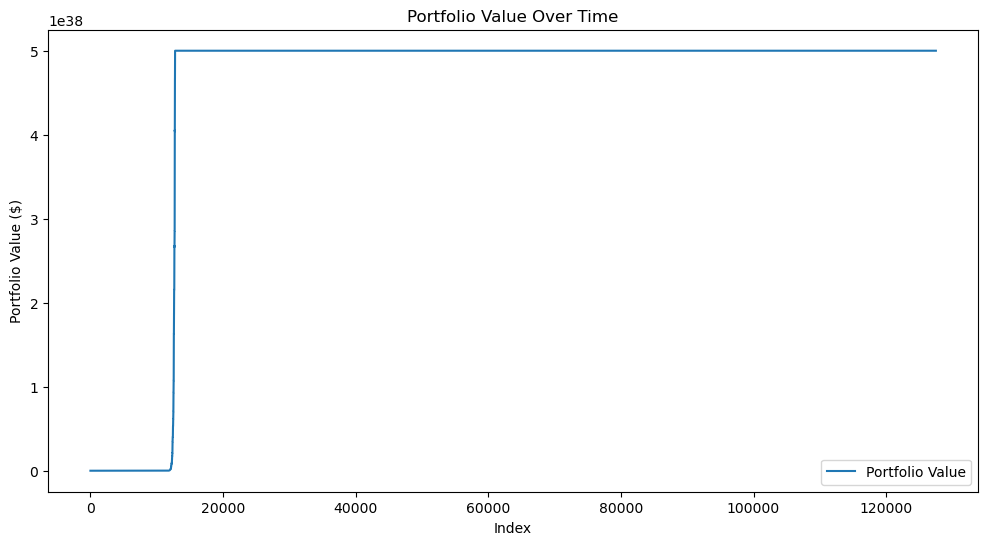

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(portfolio_values, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Index')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()